### https://github.com/ryanrudes/chess-gym

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

/Users/minseo/Documents/Github/_star14ms/Chess_AI/.conda/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


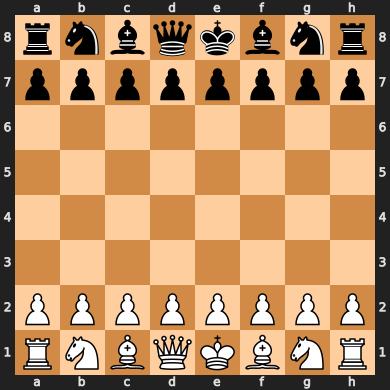

In [2]:
# run ./install.sh
import gymnasium as gym
from IPython.display import display
import chess_gym

env = gym.make("Chess-v0")
env.reset()

display(env.action_space.board)

In [6]:
import random
import numpy as np

def sample_action(action_space: gym.spaces.Space, prioritize_capture: bool = False):
    if not prioritize_capture:
        return action_space.sample()

    legal_moves = list(action_space.board.legal_moves)
    if not legal_moves:
        return np.zeros(action_space.shape, dtype=action_space.dtype)

    # Check if there are any legal capture moves
    capture_moves = [move for move in legal_moves if action_space.board.is_capture(move)]
    if capture_moves:
        return action_space._move_to_action(random.choice(capture_moves))
    else:
        return action_space.sample()


env = gym.make("Chess-v0", render_mode='human', show_possible_action_ids=True)
env.reset()

terminated = False

while not terminated:
  action = sample_action(env.action_space, prioritize_capture=True)
  observation, reward, terminated, truncated, info = env.step(action)
  # print(time_step, action, reward)
  
env.close()

KeyboardInterrupt: 

['57', '64', '65', '72', '195', '196', '277', '278', '359', '360', '441', '442', '523', '524', '605', '606', '687', '688', '769', '770']


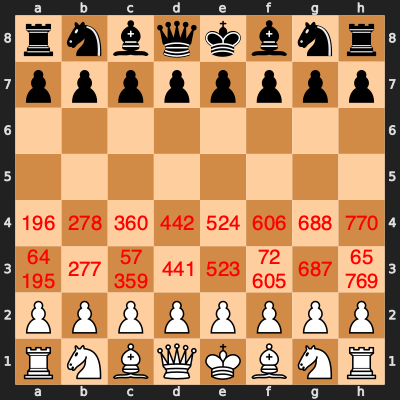

----------------------------------------------------------------------------------------------------


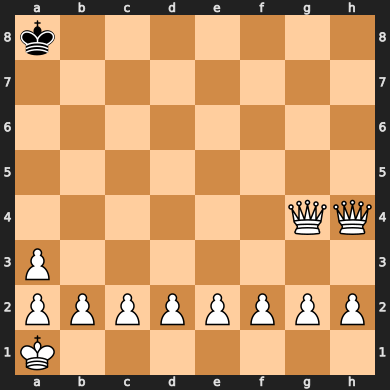

2025-05-02 20:55:55,553 - WARNING - Get Legal Moves w/ IDs: Board state theoretically impossible. Using positional mapping for all moves.
2025-05-02 20:55:55,553 - WARNING - Get Legal Moves w/ IDs: Found invalid instance index 1 (max: 0) for piece type 5 (Move: h4h8). Board state incompatible with standard action space. Returning None.


None


In [ ]:
from utils.analyze import get_legal_moves_with_action_ids
from utils.visualize import draw_possible_action_ids_on_board

env.reset()
board = env.action_space.board
print(get_legal_moves_with_action_ids(board))
display(draw_possible_action_ids_on_board(board))

print('-'*100)

# set two white queens on the board
env.reset(options={
    'fen': "k7/8/8/8/6QQ/P7/PPPPPPPP/K7",
    # 'fen': "k7/8/8/8/8/8/PPPPPPPP/K7",
})
board = env.action_space.board
display(board)
print(get_legal_moves_with_action_ids(board))

<LegalMoveGenerator at 0x11c74e850 (Kb8, Kb7, Ka7, h1=Q+, h1=R+, h1=B, h1=N)>
['a8b8', 'a8b7', 'a8a7', 'h2h1q', 'h2h1r', 'h2h1b', 'h2h1n']
h2 h1
h1=N


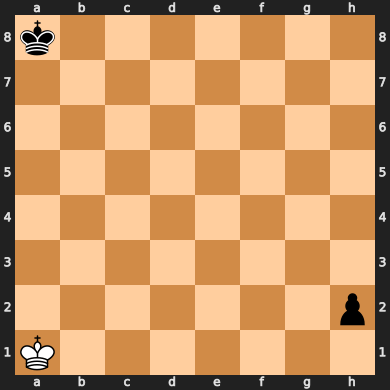

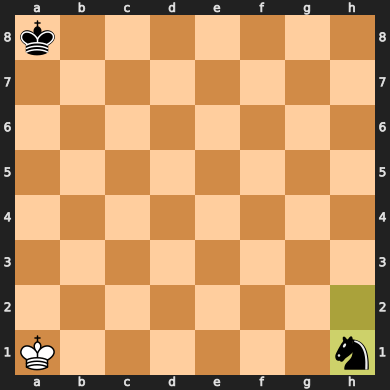

In [33]:
from chess import square_name, BLACK
from IPython.display import display

env = gym.make("Chess-v0")
options = {
    'fen': "k7/8/8/8/8/8/7p/K7 w KQkq - 0 1",
    # 'fen': "4k2r/8/8/8/8/8/7p/4K3 w KQkq - 0 1",
    'turn': BLACK
}
env.reset(options=options)
board = env.action_space.board

action = env.action_space.sample() # -> [from_square, to_square, promotion, drop, promotion_color, drop_color]
move = env.action_space._action_to_move(action)

print(board.legal_moves)
print(list(map(lambda move: move.uci(), board.legal_moves)))
print(square_name(action[0]), square_name(action[1]))
print(board.san(move))

display(board)
env.step(action)
board

### https://github.com/genyrosk/gym-chess
> Without Chess Library

In [9]:
import gymnasium as gym
from gym_chess import ChessEnvV1, ChessEnvV2

env1 = ChessEnvV1()
env2 = ChessEnvV2()

env1 = gym.make('ChessVsSelf-v1')
env2 = gym.make('ChessVsSelf-v2')

/Users/minseo/Documents/Github/_star14ms/Chess_AI/.conda/lib/python3.11/site-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment ChessVsSelf-v1 is out of date. You should consider upgrading to version `v2`.
  logger.deprecation(


In [ ]:
import random
from gym_chess import ChessEnvV1

env = ChessEnvV1() # or ChessEnvV2

# current state
state = env.state

# select a move and convert it into an action
moves = env.possible_moves
move = random.choice(moves)
# action = env.move_to_actions(move)

# or select an action directly
actions = env.possible_actions
action = random.choice(actions)

# pass it to the env and get the next state
# new_state, reward, done, info = env.step(action)
print(list(map(int, env.possible_actions)))

[40, 32, 105, 97, -86, -94, -21, -29, 44, 36, 109, 101, -82, -90, -17, -25, 104, 106, -83, -81]


/Users/minseo/Documents/Github/_star14ms/Chess_AI/repo/gym-chess/gym_chess/envs/chess_v1.py:526: RuntimeWarning: overflow encountered in scalar multiply
  return _from * 64 + _to
